# Predicting Fuel Efficiency for vehicles
In this project I inted to be perform data collection in deploying the Machine Learning Model:
1. **DATA COLLECTION** Here I will be using the classic Auto MPG from UCL ML Repositry
2. **Defining the problem statement** In this step we are going to frame the problem based on the data description and the initial exploration
3. **EDA** in this step we will carry an exploratory data analysis and try to find out the key features and create new combinations while possibly forming insights
4. **Data Preparation** in this step we  will create our own pipeline of tasks to transform our data to be loaded into new ml models
5. **Selecting snd Training models**  First we will train some selected models and then evaluate our success rate via cross validation
6. **Hyper Parameter Testing** Here we will fine tune the hyper parameters till they show us promising results
7. **Deploy model using a Flask web framework on Heroku**

In [1]:
!wget "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
#collecting data
# viewing it via this function

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#reading the cols and rows via pandas
# since here attributes are already given to us so we will create an array
# var column where we basically mention all the cols vale headers
cols=['MPG','Cylinders','Displacement','Horsepower','Weight',
      'Acceleration','Model Year','Origin' ]
df= pd.read_csv('./auto-mpg.data',names=cols,na_values="?",
                # koi bhi khali values "?" se replace ho jayegi
                comment='\t', sep=" ", skipinitialspace=True)
                #sep acts as a delimiter and comment check agar khali hai kahi pe bhi 
                #toh it ignore the rest of the values
data=df.copy() #first we make a copy of this dataset

In [4]:
data.sample(10) 


#sample 20 draws out a statistical sample of 20 random values from the entire dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
169,20.0,6,232.0,100.0,2914.0,16.0,75,1
97,18.0,6,225.0,105.0,3121.0,16.5,73,1
201,18.5,6,250.0,110.0,3645.0,16.2,76,1
345,35.1,4,81.0,60.0,1760.0,16.1,81,3
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
160,17.0,6,231.0,110.0,3907.0,21.0,75,1
333,32.7,6,168.0,132.0,2910.0,11.4,80,3
101,23.0,6,198.0,95.0,2904.0,16.0,73,1
261,18.1,6,258.0,120.0,3410.0,15.1,78,1
248,36.1,4,91.0,60.0,1800.0,16.4,78,3


## As per the data set we need to find
"The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes." (Quinlan, 1993)"
SO we are interesed in predicting the MPG or Miles per gallon
Hence our target variable is MPG and the rest of the attributes will be our feature vairables



## Problem Statement
Our aim is to **Predict the the MPG of a given vehicle** provided we have other features variables for that vehicle

## EDA 
1. Have a look at the data type of columns
2. Find the null values
3. Check for the outliers
4. Try to look for categorical distribution in the categrocial cols
5. Plot the new correlation
6. Look for new variables

In [5]:
## checking for the basic data info
data.info() 
# we generally do this earlier when attribute info is not given
# this one function also tells us abou the data type of the variables 
# provided to us also helps us in knowing the memory and tells if the data type is categorical or non categorical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [6]:
#checking and finding the null values
data.isnull().sum() #finds the sum of all the null values


MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

here we see that only horsepower has null values and just 6 of them


In [7]:
##summary of data
data.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


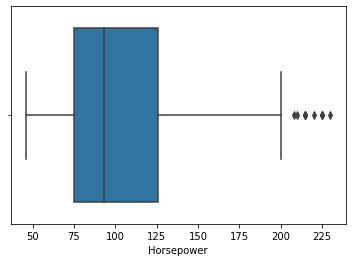

In [8]:
sns.boxplot(x=data['Horsepower']);


In [9]:
"""
based on the nature of the values i think the most ideal way
to fill in the blank values is by using the median here
"""
median = data['Horsepower'].median() #pehle median nikala 
data['Horsepower']=data['Horsepower'].fillna(median) #phir median ki values daali

In [10]:
#categorically distibution the data
data['Cylinders'].value_counts() 
#here we have basically jotted down ki ek cylinder class ke kitne saare values hai poore dataset mein

4    204
8    103
6     84
3      4
5      3
Name: Cylinders, dtype: int64

In [11]:
data['Cylinders'].value_counts()/len(data)
#now we just divide them to get the distribution of these are 4 has the highest percentage more than 50% of these values 
# are for 4 cylinder so we can understand the distribution

4    0.512563
8    0.258794
6    0.211055
3    0.010050
5    0.007538
Name: Cylinders, dtype: float64

In [12]:
data['Origin'].value_counts() #for origin let's do the same

1    249
3     79
2     70
Name: Origin, dtype: int64

In [13]:
data['Origin'].value_counts()/len(data) #origin is defined by countries in which they were made

1    0.625628
3    0.198492
2    0.175879
Name: Origin, dtype: float64

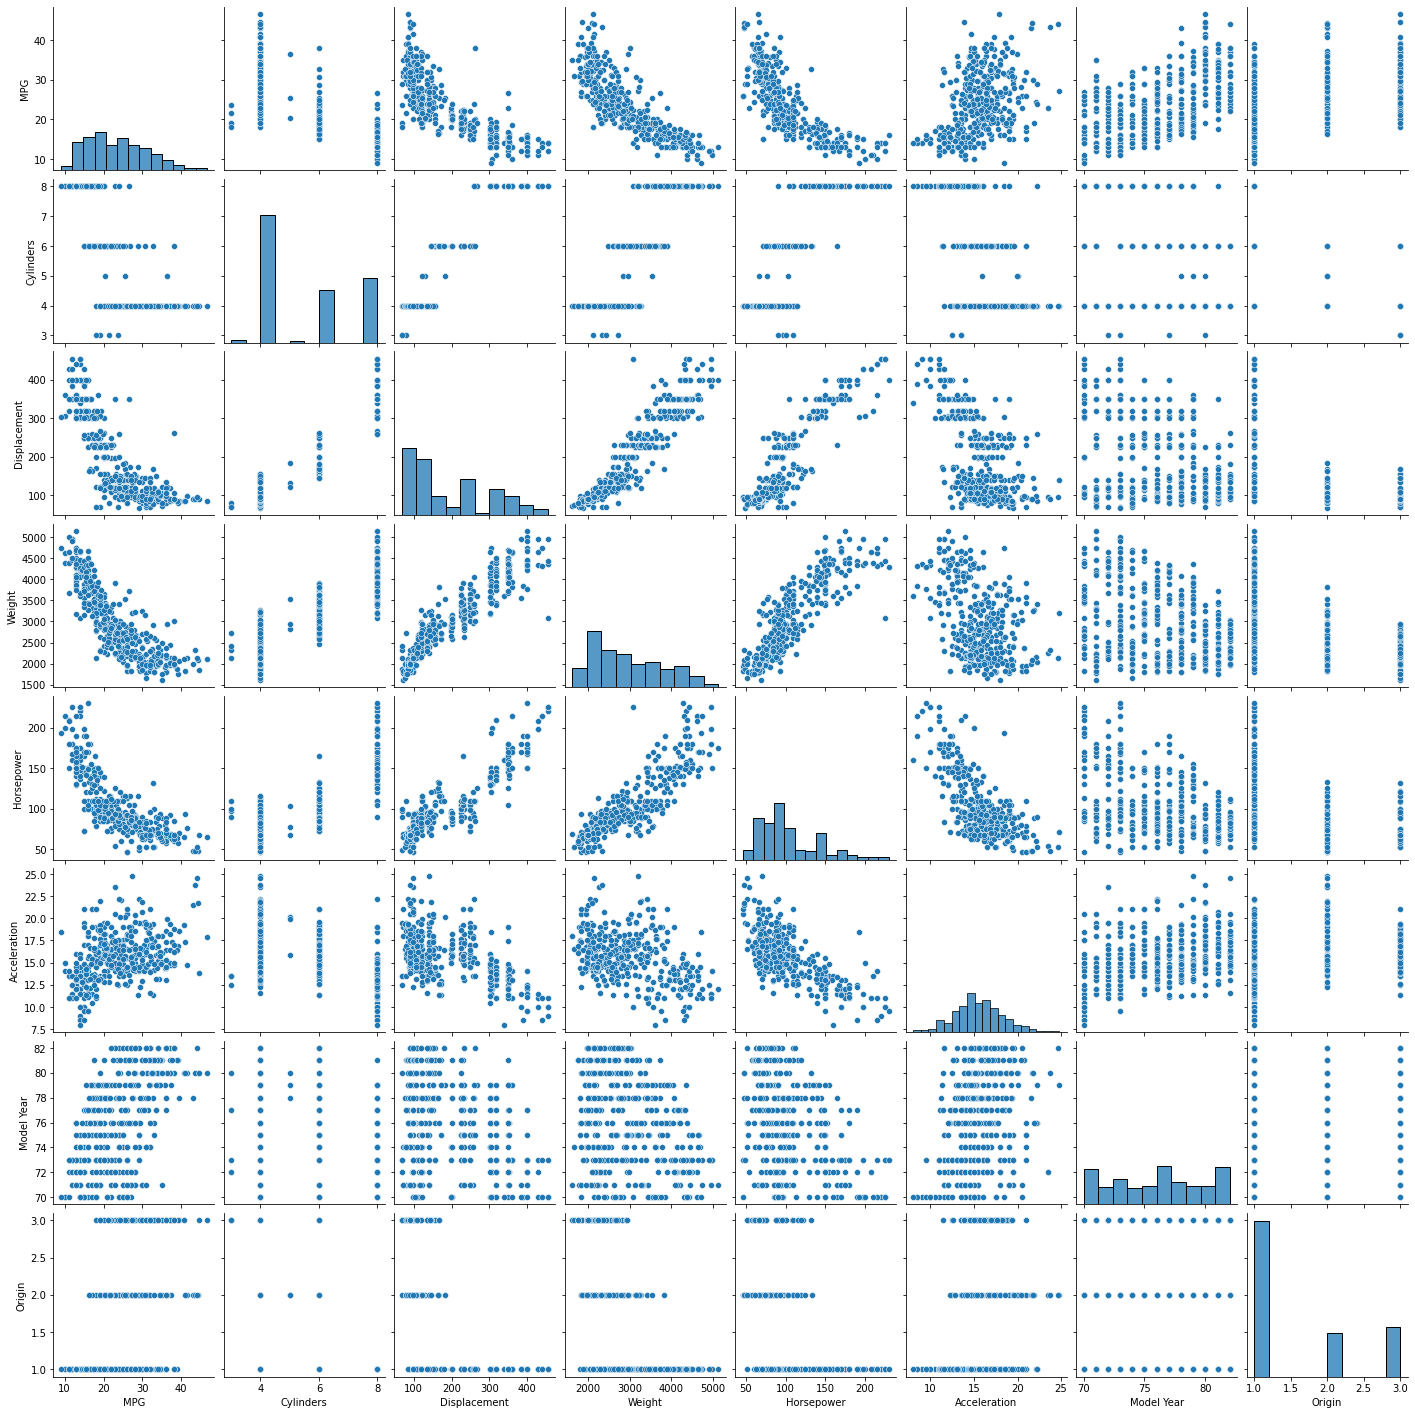

In [14]:
# forming pair plots in order to  form possible correlationse
g=sns.pairplot(data[["MPG","Cylinders","Displacement","Weight","Horsepower",'Acceleration','Model Year','Origin']]);
g.fig.set_size_inches(20,20)

## Data Preparation
1. Handling Categorical Data with the help of OneHotEncoder
2. Data Cleaning by using imputer
3. Adding Attributes and addong custom transformation
4. Setting up Data Transfromation Pipeline for numerical and categorical columns

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
import warnings
warnings.filterwarnings('ignore')

In [16]:
split= StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=12)
for train_index,test_index in split.split(data,data['Cylinders']):
    strat_train_set= data.loc[train_index]
    start_test_set=data.loc[test_index]

### Seperating the Target and the Feature Variables

In [17]:
data = strat_train_set.drop("MPG",axis=1) #drop MPG and put all train vars here
data_labels=strat_train_set["MPG"].copy() #putting in only the test var here
data

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
250,8,318.0,140.0,3735.0,13.2,78,1
266,4,98.0,68.0,2155.0,16.5,78,1
77,4,121.0,76.0,2511.0,18.0,72,2
230,8,350.0,170.0,4165.0,11.4,77,1
240,4,97.0,78.0,2190.0,14.1,77,2
...,...,...,...,...,...,...,...
179,4,121.0,98.0,2945.0,14.5,75,2
320,4,119.0,92.0,2434.0,15.0,80,3
62,8,350.0,165.0,4274.0,12.0,72,1
329,4,91.0,67.0,1850.0,13.8,80,3


### Preprocessing the Origin Column

In [18]:
def preprocess_org(df): #here we made a function which takes a dictionary
    # it takes the keys one 1,2,3 in the origion cols and assigns them to the country we gave here
    df["Origin"]=df["Origin"].map({1:'India',2:"USA",3:"Germany"})
    return df
data_tr= preprocess_org(data)
data_tr.head

<bound method NDFrame.head of      Cylinders  Displacement  Horsepower  Weight  Acceleration  Model Year  \
250          8         318.0       140.0  3735.0          13.2          78   
266          4          98.0        68.0  2155.0          16.5          78   
77           4         121.0        76.0  2511.0          18.0          72   
230          8         350.0       170.0  4165.0          11.4          77   
240          4          97.0        78.0  2190.0          14.1          77   
..         ...           ...         ...     ...           ...         ...   
179          4         121.0        98.0  2945.0          14.5          75   
320          4         119.0        92.0  2434.0          15.0          80   
62           8         350.0       165.0  4274.0          12.0          72   
329          4          91.0        67.0  1850.0          13.8          80   
261          6         258.0       120.0  3410.0          15.1          78   

      Origin  
250    India  
266

### One Hot Encoding the Origin Columns

In [19]:
data_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318 entries, 250 to 261
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Cylinders     318 non-null    int64  
 1   Displacement  318 non-null    float64
 2   Horsepower    318 non-null    float64
 3   Weight        318 non-null    float64
 4   Acceleration  318 non-null    float64
 5   Model Year    318 non-null    int64  
 6   Origin        318 non-null    object 
dtypes: float64(4), int64(2), object(1)
memory usage: 19.9+ KB


now that we have converted the origin to a categorical col our problem should be easier to address


In [20]:
## isolating the origin coln
data_cat=data_tr[["Origin"]]
data_cat.head() #SEGREGATED THE ORIGIN

,Origin
250,India
266,India
77,USA
230,India
240,USA


In [21]:
#onehotencoding to of this data's categorical values 
# we use this instead of the dummy vars be
from sklearn.preprocessing import OneHotEncoder 
cat_encoder= OneHotEncoder()
data_cat_1hot=cat_encoder.fit_transform(data_cat)#here it takes the categorical variable and computes for the classes that the classes that avaible and then we return a sparse matrix
data_cat_1hot #the sparse matrix

<318x3 sparse matrix of type '<class 'numpy.float64'>'
	with 318 stored elements in Compressed Sparse Row format>

In [22]:
data_cat_1hot.toarray()[:15] #toh ye har class ko ek basically ek vector mein convert kar degaa
#here we only have 3 classes so e have converted that data in a sparse matrix 
#and we can clearly that for the 1 wala represents waise hi second represents second and third for 3


array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [23]:
cat_encoder.categories_ # tells the category we just converted

[array(['Germany', 'India', 'USA'], dtype=object)]

### Adding Atrributes using the BaseEstimator and Transformer

In [24]:
#segregating the numerical cols
num_data=data.iloc[:,:-1]
num_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318 entries, 250 to 261
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Cylinders     318 non-null    int64  
 1   Displacement  318 non-null    float64
 2   Horsepower    318 non-null    float64
 3   Weight        318 non-null    float64
 4   Acceleration  318 non-null    float64
 5   Model Year    318 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 17.4 KB


In [25]:
num_data.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
250,8,318.0,140.0,3735.0,13.2,78
266,4,98.0,68.0,2155.0,16.5,78
77,4,121.0,76.0,2511.0,18.0,72
230,8,350.0,170.0,4165.0,11.4,77
240,4,97.0,78.0,2190.0,14.1,77


In [26]:
from sklearn.base import BaseEstimator, TransformerMixin
acc_index, hpower_index, cyl_index=4,2,0
class CustomAttrAddr(BaseEstimator,TransformerMixin):
    def __init__(self, acc_on_power=True): # no *args or **kargs
        self.acc_on_power = acc_on_power
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        acc_on_cyl = X[:, acc_index] / X[:, cyl_index]
        if self.acc_on_power:
            acc_on_power = X[:, acc_index] / X[:, hpower_index]
            return np.c_[X, acc_on_power, acc_on_cyl]
        
        return np.c_[X, acc_on_cyl]
    
attr_adder = CustomAttrAddr(acc_on_power=True)
data_tr_extra_attrs = attr_adder.transform(data_tr.values)
data_tr_extra_attrs[0]

array([8, 318.0, 140.0, 3735.0, 13.2, 78, 'India', 0.09428571428571428,
       1.65], dtype=object)

### Creating a pipeline of Tasks

In [27]:
from sklearn.impute import SimpleImputer
##Using Pipeline class
from sklearn.pipeline import Pipeline
##Using StandardScaler to scale all the numerical attributes
from sklearn.preprocessing import StandardScaler

numerics = ['float64', 'int64']

num_data = data_tr.select_dtypes(include=numerics)

##pipeline for numerical attributes
##imputing -> adding attributes -> scale them
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attrs_adder', CustomAttrAddr()),
        ('std_scaler', StandardScaler()),
    ])

num_data_tr = num_pipeline.fit_transform(num_data)
num_data_tr[0]

array([ 1.50179333,  1.2034462 ,  0.91728523,  0.90708396, -0.86458625,
        0.5713031 , -1.00600031, -1.30518625])

### Transforming numerical to categorical variables

In [28]:
##Transform different columns or subsets using ColumnTransformer
from sklearn.compose import ColumnTransformer

num_attrs = list(num_data)
cat_attrs = ["Origin"]

##complete pipeline to transform 
##both numerical and cat. attributes
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attrs),
        ("cat", OneHotEncoder(), cat_attrs),
    ])

prepared_data = full_pipeline.fit_transform(data)
prepared_data[0]

array([ 1.50179333,  1.2034462 ,  0.91728523,  0.90708396, -0.86458625,
        0.5713031 , -1.00600031, -1.30518625,  0.        ,  1.        ,
        0.        ])